In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
from MAB import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Parameters and aliases for all algorithms

In [3]:
mapping = {'MAG': GaussianMAMAB}
mapping_name = {'MAG': 'Gaussian'}

### Static UCB in non stationary environment : fails...

In [4]:
bandit = 'MAG'
T = 100  # Horizon
N = 1  # Number of MC runs
step = 25  # If results are saved trajectories are stored for all rounds such that t%step=0

p = [
    [lambda t: np.cos(2 * np.pi * t / 100), 0.2],
    [lambda t: np.sin(2 * np.pi * t / 100), 0.2]
]
model = mapping[bandit](p)

r, _ = model.MC_regret('UCB1', N, T, {'rho': 1.0}, step)
res = pd.DataFrame([r]).T
res.columns = ['UCB']

Computing 1 simulations: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


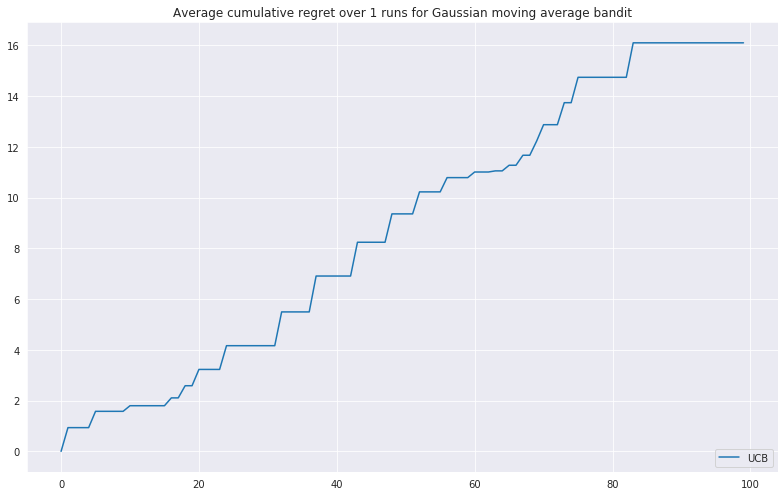

In [5]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(11, 7), nrows=1, ncols=1)

    res.plot(ax=ax)
    
    ax.legend(loc='lower right')
    ax.set_title('Average cumulative regret over {} runs for {:s} moving average bandit'.format(N, mapping_name[bandit]))

    plt.tight_layout()
    plt.show()

### Weighted subsampling algorithms

In [6]:
bandit = 'MAG'
T = 500  # Horizon
N = 1  # Number of MC runs
step = 25  # If results are saved trajectories are stored for all rounds such that t%step=0

p = [
    [lambda t: np.cos(2 * np.pi * t / 100), 0.1],
    [lambda t: -np.cos(2 * np.pi * t / 100), 0.1]
]
model = mapping[bandit](p)

# all_r = []
# columns = []
# for gamma in np.linspace(0.1, 0.9, 9):
#     r, _ = model.MC_regret(
#         'weighted_bootstrap', 
#         N, 
#         T, 
#         {'gamma': gamma, 'explo_func': lambda t: np.sqrt(np.log(t))},
#         step
#     )
#     all_r.append(r)
#     columns.append('gamma={:.1f}'.format(gamma))
# res = pd.DataFrame(all_r).T
# res.columns = columns

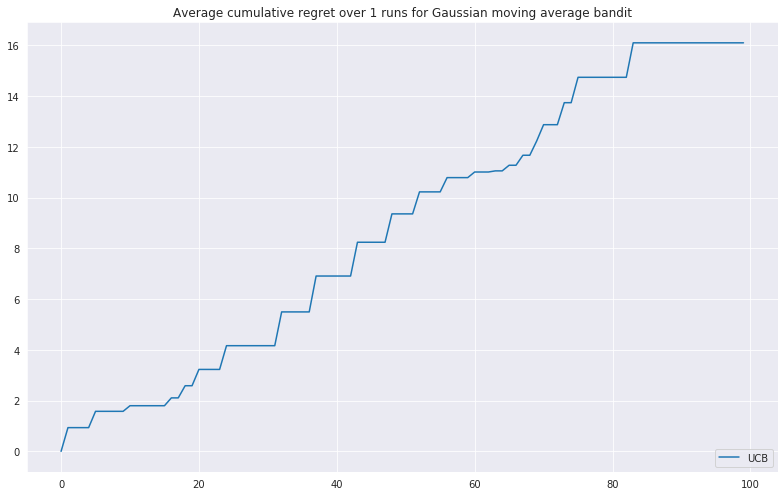

In [7]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(11, 7), nrows=1, ncols=1)

    res.plot(ax=ax)
    
    ax.legend(loc='lower right')
    ax.set_title('Average cumulative regret over {} runs for {:s} moving average bandit'.format(N, mapping_name[bandit]))

    plt.tight_layout()
    plt.show()

In [8]:
param = {
    'UCB1': {},
    'weighted_bootstrap': {'gamma': 0.8},
    'weighted_SDA': {'gamma': 0.4},
}

algs = [
    'UCB1', 
    'weighted_bootstrap', 
    'weighted_SDA',
]  # Select some Algorithms (check param file for availability)

bandit = 'MAG'
T = 1000  # Horizon
N = 1  # Number of MC runs
step = 25  # If results are saved trajectories are stored for all rounds such that t%step=0


# res, traj = multiprocess_MC(
#     (bandit, p, T, N, algs, param, step, 'mean'),
#     plot=False, 
#     caption=None,
# )


res, traj = MC_xp(
    (bandit, p, T, N, algs, param, step, 'mean', False),
    plot=False, 
    caption=None,
)


Computing 1 simulations:   0%|          | 0/1 [00:00<?, ?it/s]/home/sauxpa/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sauxpa/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Computing 1 simulations: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


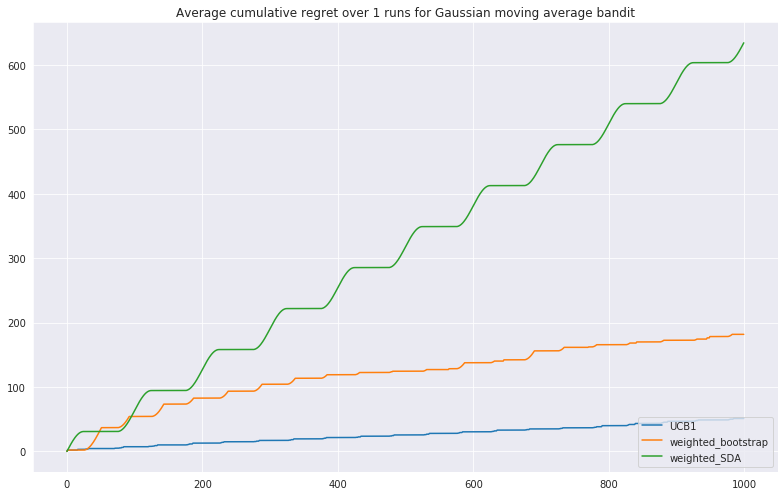

In [9]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(11, 7), nrows=1, ncols=1)

    res.plot(ax=ax)
    
    ax.legend(loc='lower right')
    ax.set_title('Average cumulative regret over {} runs for {:s} moving average bandit'.format(N, mapping_name[bandit]))

    plt.tight_layout()
    plt.show()